In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from datetime import datetime
import numpy as np
import covidutil as cu
import seaborn as sns

In [2]:
folder = "c:/PY-ML/data/covid1906/"
file = folder + "case_time_series.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df['Date'] = pd.to_datetime(df["Date"])

In [5]:
df.drop(columns = 'Date_YMD',inplace = True)

In [6]:
df['Day'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Active'] = df['Total Confirmed'] - df['Total Recovered'] - df['Total Deceased']


In [7]:
df['pctchange'] = df['Daily Confirmed'].pct_change()

In [8]:
df.set_index('Date', inplace = True)

In [9]:
df['pctchange'].unique()

array([            nan, -1.00000000e+00,             inf,  0.00000000e+00,
       -5.00000000e-01,  2.10000000e+01, -9.09090909e-01,  2.00000000e+00,
        6.66666667e-01,  8.00000000e-01, -4.66666667e-01,  2.50000000e-01,
        1.00000000e-01, -9.09090909e-02,  4.00000000e-01,  4.28571429e-01,
        8.00000000e-02,  1.14814815e+00,  3.44827586e-01, -1.15384615e-01,
        3.62318841e-01, -2.12765957e-01,  1.62162162e-01, -1.51162791e-01,
        1.09589041e+00, -1.11111111e-01, -1.17647059e-01,  5.58333333e-01,
        6.52406417e-01,  3.72168285e-01,  1.46226415e-01,  1.52263374e-01,
        3.39285714e-02,  5.18134715e-02, -2.05254516e-01,  1.83884298e-01,
       -1.39616056e-02,  4.38938053e-01,  7.13407134e-02, -1.95177956e-02,
       -1.12412178e-01,  6.39841689e-01, -1.70555109e-01, -1.40640155e-01,
        1.97516930e-01, -1.31008483e-01,  4.86984816e-01,  1.52443472e-01,
       -2.15822785e-01,  2.40516546e-01, -1.59401431e-01,  2.90247678e-01,
       -1.55368926e-01,  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2020-01-30 to 2021-06-19
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Daily Confirmed  507 non-null    int64  
 1   Total Confirmed  507 non-null    int64  
 2   Daily Recovered  507 non-null    int64  
 3   Total Recovered  507 non-null    int64  
 4   Daily Deceased   507 non-null    int64  
 5   Total Deceased   507 non-null    int64  
 6   Day              507 non-null    object 
 7   Year             507 non-null    int64  
 8   Month            507 non-null    int64  
 9   Active           507 non-null    int64  
 10  pctchange        479 non-null    float64
dtypes: float64(1), int64(9), object(1)
memory usage: 47.5+ KB


In [11]:
df.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Year,Month,Active,pctchange
count,507.000000,5.070000e+02,507.000000,5.070000e+02,507.000000,507.000000,507.000000,507.000000,5.070000e+02,479.000000
mean,58937.254438,7.569755e+06,56722.542406,6.858436e+06,761.637081,102210.234714,2020.335306,5.767258,6.091083e+05,inf
std,87207.394754,7.946027e+06,85233.098169,7.290804e+06,1073.657311,94824.074370,0.472563,3.253620,8.355871e+05,NaN
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,2020.000000,1.000000,0.000000e+00,-1.000000
25%,8800.500000,2.314590e+05,5049.500000,1.108390e+05,107.500000,6505.000000,2020.000000,3.000000,1.141150e+05,-0.064095
50%,26834.000000,6.977102e+06,23623.000000,5.985813e+06,390.000000,106864.000000,2020.000000,5.000000,3.018530e+05,0.012417
75%,67539.000000,1.089860e+07,64293.000000,1.060412e+07,903.500000,155042.500000,2021.000000,8.000000,7.502565e+05,0.094781
max,414280.000000,2.988119e+07,422391.000000,2.875833e+07,6139.000000,386150.000000,2021.000000,12.000000,3.751539e+06,inf


In [12]:
from matplotlib import pyplot as plt

def get_subplots(data):
    
    fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize = (15,15),sharex = False)
    ax1.plot(data['Total Deceased'])
    ax1.set_title('Total Deceased')
    ax1.set_xlabel('days')
    ax1.set_ylabel('Deaths')

    ax2.plot(data['Daily Deceased'])
    ax2.set_title('Daily Deceased')
    ax2.set_xlabel('days')
    ax2.set_ylabel('Deaths')

    ax3.plot(data['Total Recovered'])
    ax3.set_title('Total Recovered')
    ax3.set_ylabel('total recoveries')


    ax4.plot(data['Daily Recovered'])
    ax4.set_title('Daily Recovered')
    ax4.set_ylabel('daily recoveries')
    ax4.set_xlabel('days')


    ax5.plot(data['Total Confirmed'])
    ax5.set_title('Total Confirmed')
    ax5.set_ylabel('total confirmed')
    ax5.set_xlabel('days')


    ax6.plot(data['Daily Confirmed'])
    ax6.set_title('Daily Confirmed')
    ax6.set_ylabel('daily confirmed')
    ax6.set_xlabel('days')
    

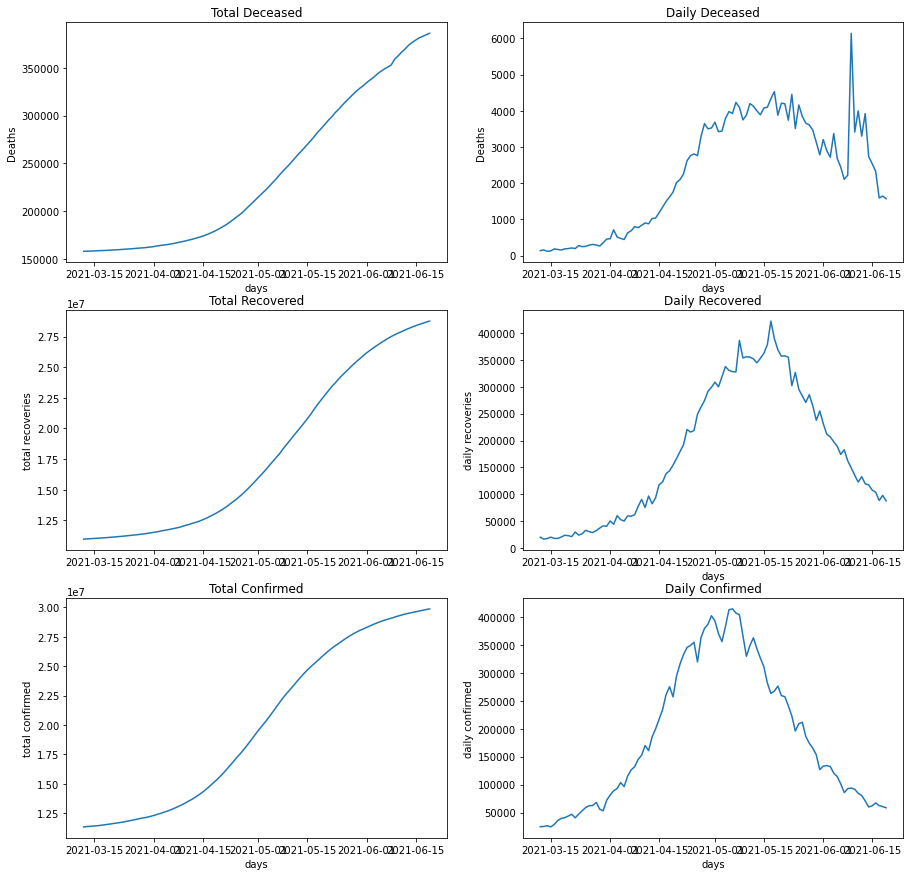

In [13]:
get_subplots(data = df[-100:])

# subplots

Text(0.5, 0, 'days')

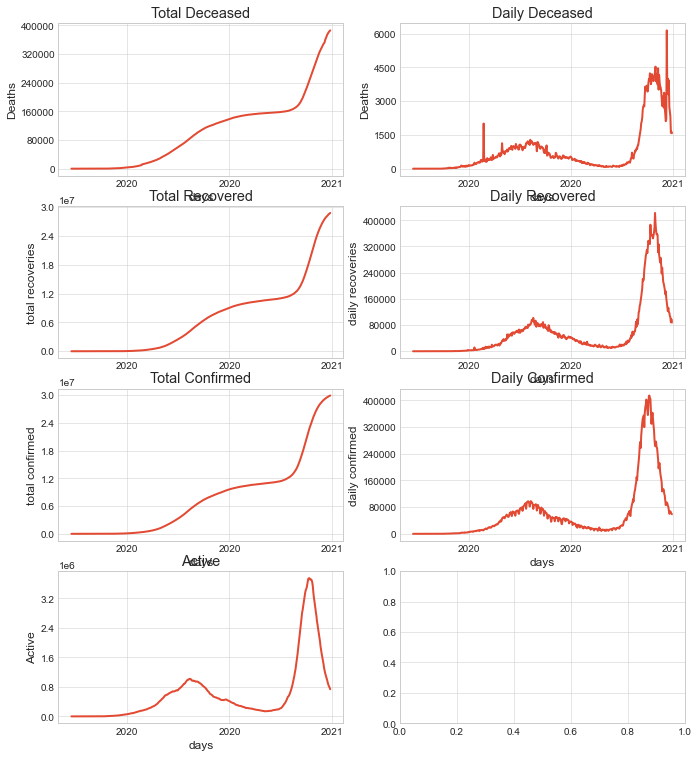

In [47]:
plt.style.use('seaborn-whitegrid')
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize = (10,12),sharex = False)

ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
ax1.plot(df['Total Deceased'])
ax1.set_title('Total Deceased')
ax1.set_xlabel('days')
ax1.set_ylabel('Deaths')

ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_major_locator(plt.MaxNLocator(6))
ax2.plot(df['Daily Deceased'])
ax2.set_title('Daily Deceased')
ax2.set_xlabel('days')
ax2.set_ylabel('Deaths')

ax3.xaxis.set_major_locator(plt.MaxNLocator(3))
ax3.yaxis.set_major_locator(plt.MaxNLocator(6))
ax3.plot(df['Total Recovered'])
ax3.set_title('Total Recovered')
ax3.set_ylabel('total recoveries')

ax4.xaxis.set_major_locator(plt.MaxNLocator(3))
ax4.yaxis.set_major_locator(plt.MaxNLocator(6))
ax4.plot(df['Daily Recovered'])
ax4.set_title('Daily Recovered')
ax4.set_ylabel('daily recoveries')
ax4.set_xlabel('days')

ax5.xaxis.set_major_locator(plt.MaxNLocator(3))
ax5.yaxis.set_major_locator(plt.MaxNLocator(6))
ax5.plot(df['Total Confirmed'])
ax5.set_title('Total Confirmed')
ax5.set_ylabel('total confirmed')
ax5.set_xlabel('days')

ax6.xaxis.set_major_locator(plt.MaxNLocator(3))
ax6.yaxis.set_major_locator(plt.MaxNLocator(6))
ax6.plot(df['Daily Confirmed'])
ax6.set_title('Daily Confirmed')
ax6.set_ylabel('daily confirmed')
ax6.set_xlabel('days')

ax7.xaxis.set_major_locator(plt.MaxNLocator(3))
ax7.yaxis.set_major_locator(plt.MaxNLocator(6))
ax7.plot(df["Active"])
ax7.set_title("Active")
ax7.set_ylabel("Active")
ax7.set_xlabel('days')

### 1

In [17]:
df2 = df[['Daily Confirmed','Daily Recovered','Daily Deceased']]

In [18]:
df2.nlargest(5,'Daily Confirmed')

,Daily Confirmed,Daily Recovered,Daily Deceased
Date,,,
2021-05-06,414280,328349,3923
2021-05-05,412624,330718,3979
2021-05-07,406901,327675,4233
2021-05-08,403808,386395,4092
2021-04-30,402014,299198,3525


In [19]:
df2.nlargest(15,'Daily Deceased')

,Daily Confirmed,Daily Recovered,Daily Deceased
Date,,,
2021-06-09,93883,149022,6139
2021-05-18,267246,389758,4529
2021-05-23,222834,302253,4454
2021-05-17,263021,422391,4334
2021-05-07,406901,327675,4233
2021-05-20,259242,357173,4209
2021-05-11,348555,355398,4198
2021-05-21,257299,357625,4194
2021-05-25,208992,295264,4160


In [20]:
df2.nlargest(15,'Daily Recovered')

,Daily Confirmed,Daily Recovered,Daily Deceased
Date,,,
2021-05-17,263021,422391,4334
2021-05-18,267246,389758,4529
2021-05-08,403808,386395,4092
2021-05-16,281837,378526,4098
2021-05-19,276187,369005,3877
2021-05-15,310757,362547,4077
2021-05-21,257299,357625,4194
2021-05-20,259242,357173,4209
2021-05-10,329491,355930,3879


##seaborn practice 

In [21]:
df1 = df.loc['2020-06-09':'2021-06-10']

In [31]:
df1 = df[['Daily Confirmed','Daily Recovered','Daily Deceased']]

<AxesSubplot:xlabel='Active', ylabel='Daily Confirmed'>

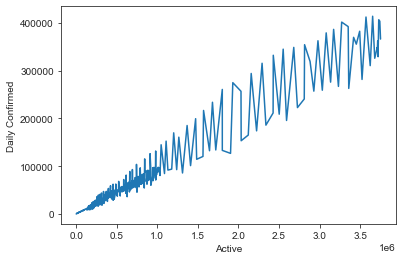

In [36]:
sns.lineplot(x = "Active", y = 'Daily Confirmed', data = df )

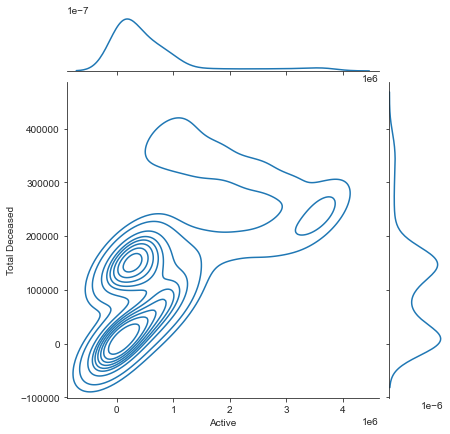

In [29]:
sns.jointplot(data =df, x = 'Active', y = 'Total Deceased', kind = 'kde')

<AxesSubplot:xlabel='Daily Confirmed'>

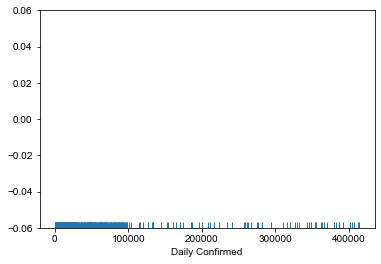

In [28]:
plt.ticklabel_format(style='plain')
sns.set_style('ticks')
sns.rugplot(df['Daily Confirmed'])

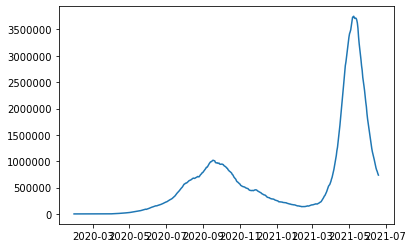

In [27]:
plt.ticklabel_format(style = 'plain')
plt.plot(df['Active'])

In [26]:
df[df['Active'] == df['Active'].max()]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Year,Month,Active,pctchange
Date,,,,,,,,,,,
2021-05-09,366455,22662329,353777,18665233,3749,245557,Sunday,2021,5,3751539,-0.092502


In [25]:
df[df['Daily Confirmed'] == df['Daily Confirmed'].max() ]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Year,Month,Active,pctchange
Date,,,,,,,,,,,
2021-05-06,414280,21485165,328349,17597386,3923,233483,Thursday,2021,5,3654296,0.004013


In [24]:
df[df['Daily Recovered'] == df['Daily Recovered'].max() ]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Year,Month,Active,pctchange
Date,,,,,,,,,,,
2021-05-17,263021,25227883,422391,21589906,4334,278160,Monday,2021,5,3359817,-0.066762


In [23]:
df[df['Daily Deceased'] == df['Daily Deceased'].max() ]

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Day,Year,Month,Active,pctchange
Date,,,,,,,,,,,
2021-06-09,93883,29181911,149022,27645065,6139,359106,Wednesday,2021,6,1177740,0.011812
